# Project 1: EDA with PySpark

* **Your Group Number: Group 5**
* **Each Team Members Name and Student ID: **

**Shailesh Yadav (.)**

**Vasudha Mishra (.)**



By submitting this group work, “I accept responsibility for my role in ensuring the integrity of the work submitted by the group in which I participated.”

[source](https://www.rochester.edu/college/honesty/instructors/pledge.html)

# Introduction

The purpose of this project is to help you apply what you learned in the previous lectures to a real-world dataset. At the end of it, you will have a self-contained notebook that you can brag about in job interviews. I've left some code cells and given some info on dataframe shape to help you check your work...

Now let's go tackle the PPP dataset and find some interesting trends using PySpark!

## Download PPP data

You can download the data from here (https://data.sba.gov/dataset/ppp-foia). We will use the first three files.

I have tried copying the link address and pasting it here (so no need to mount your Google Drive) - but the link address changes every few months, so instead we can download locally, drag to Google Drive, and use a shareable link.

In [1]:
# download the SBA data
# would be great but the link changes every quarter!
!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/2b55e11d-7e75-4bbb-b526-69a06c0c4731/download/public_150k_plus_230101.csv
!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/b785dfac-7d99-4bc0-9ab2-e87fe855174e/download/public_up_to_150k_2_230101.csv
!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/5f700a26-02f9-4d97-94a3-e3c2c43871eb/download/public_up_to_150k_1_230101.csv

Downloading...
From: https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/2b55e11d-7e75-4bbb-b526-69a06c0c4731/download/public_150k_plus_230101.csv
To: /content/public_150k_plus_230101.csv
100% 452M/452M [00:03<00:00, 128MB/s]
Downloading...
From: https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/b785dfac-7d99-4bc0-9ab2-e87fe855174e/download/public_up_to_150k_2_230101.csv
To: /content/public_up_to_150k_2_230101.csv
100% 412M/412M [00:03<00:00, 109MB/s]
Downloading...
From: https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/5f700a26-02f9-4d97-94a3-e3c2c43871eb/download/public_up_to_150k_1_230101.csv
To: /content/public_up_to_150k_1_230101.csv
100% 414M/414M [00:03<00:00, 118MB/s]


For some reason, I had to upgrade gdown to download a massive .csv file from my Google Drive... run this then try to download the files from your Google Drive!

In [2]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [3]:
# download from Dave's google drive
!gdown 1JGW0DmOkR39tC8DiExRNbAoAsoy7JGwm
!gdown 1pIgGStXobZM9MkenPTduLfGwcJl9xwZh
!gdown 10C_r3jdN4iOb0KmHg7gk3FIS7DMNriaV

Downloading...
From: https://drive.google.com/uc?id=1JGW0DmOkR39tC8DiExRNbAoAsoy7JGwm
To: /content/public_150k_plus_230101.csv
100% 452M/452M [00:04<00:00, 102MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pIgGStXobZM9MkenPTduLfGwcJl9xwZh
To: /content/public_up_to_150k_1_230101.csv
100% 413M/413M [00:04<00:00, 96.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=10C_r3jdN4iOb0KmHg7gk3FIS7DMNriaV
To: /content/public_up_to_150k_2_230101.csv
100% 412M/412M [00:03<00:00, 109MB/s]


If you look left, you should be able to see the three big .csv files on the lefthand side.

## Download zipcode-level socioeconomic data
It's generally not known what census tract a business resides in, but the zipcode is almost always known. 

This repo (https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode) has zipcode-level census attributes. I have downloaded all of the files to our local runtime on the left.

In [4]:
!gdown https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/raw/master/rural_urban.txt
!gdown https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/raw/master/demo.txt
!gdown https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/raw/master/housing.txt
!gdown https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/raw/master/econ.txt
!gdown https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/raw/master/social.txt

Downloading...
From: https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/raw/master/rural_urban.txt
To: /content/rural_urban.txt
923kB [00:00, 26.4MB/s]       
Downloading...
From: https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/raw/master/demo.txt
To: /content/demo.txt
26.7MB [00:00, 82.9MB/s]
Downloading...
From: https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/raw/master/housing.txt
To: /content/housing.txt
49.0MB [00:00, 70.4MB/s]
Downloading...
From: https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/raw/master/econ.txt
To: /content/econ.txt
49.7MB [00:00, 85.0MB/s]
Downloading...
From: https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/raw/master/social.txt
To: /content/social.txt
46.0MB [00:00, 119MB/s]


# Install Spark

In [5]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [6]:
# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

In [7]:
# unzip the spark file to the current folder
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

In [8]:
# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [9]:
# install findspark using pip
!pip install -q findspark

In [10]:
# findspark
import findspark
findspark.init()

# Start session

We start the builder pattern `SparkSession.builder` and then chain a configuration parameter that defined the application name.

Providing a useful `appName` helps you identify which programs are running on your Spark cluster.

In [11]:
from pyspark.sql import SparkSession
# for concise script, we import all functions as F
import pyspark.sql.functions as F

spark = SparkSession.builder\
        .appName("Project1_EDA_with_PySpark")\
        .getOrCreate()

# 🔴 Organize your folders (5 pts)

## (1) Create a folder on the local runtime called 'census' and copy all of the .txt files over to this folder
Like we did in class!

In [12]:
# make a directory called census
%pwd

'/content'

In [13]:
%mkdir census

In [14]:
%cd /content/census

/content/census


In [15]:
%pwd

'/content/census'

In [16]:
# move all of the txt files we just downloaded
%ls

In [17]:
%mv /content/econ.txt /content/census

In [18]:
%mv /content/demo.txt /content/housing.txt /content/rural_urban.txt /content/social.txt /content/census

In [19]:
%ls

demo.txt  econ.txt  housing.txt  rural_urban.txt  social.txt


## (2) Create a folder on the local runtime called 'PPP' and copy all of the .csv files over to this folder
Like we did in class! Use mv and not cp.

In [20]:
#go back a folder
%cd ..

/content


In [21]:
# make a directory called PPP
%mkdir PPP

In [22]:
# goto PPP folder
%cd PPP

/content/PPP


In [23]:
%ls

In [24]:
%pwd

'/content/PPP'

In [25]:
%mv /content/public_up_to_150k_2_230101.csv /content/public_up_to_150k_1_230101.csv /content/public_150k_plus_230101.csv /content/PPP

# 🔴 Clean the PPP data (10 points)

## (1) Append/concatenate all of the PPP csv files together
You should end up with ~2.76M rows and 53 columns if you did it right. You only need one line of code if you use the wildcard. Make sure you print the rows and column count to check your work or points off!

In [26]:
from  pyspark.sql.functions import input_file_name, udf, col
from pyspark.sql import SQLContext
from pyspark.sql.types import *


In [27]:
# Load the first CSV file into a DataFrame
ppp = spark.read.option("header", "true").csv("/content/PPP/public_150k_plus_230101.csv")

# Load the rest of the CSV files and union them with the first DataFrame
files = ["/content/PPP/*"]
for file in files:
    ppp = ppp.union(spark.read.option("header", "true").csv(file))

There are zipcode fields for the business and the banks! But be careful, there are null values!

## (2) Clean the zipcode column for PPP files
There are some that are missing and there are some that have a long format (12345-6789).

We only want records where the `BorrowerZip`:
*  zip code exists (is non-null)
*  if it does exist, make return only the first 5 digits (https://www.datasciencemadesimple.com/extract-first-n-and-last-n-character-in-pyspark/)

Now answer:
* How many rows did you drop? 
* What percentage of the original data was returned? Do you think this is acceptable data quality?

In [ ]:
rows1 = ppp.count()
rows1

2768531

In [ ]:
# Remove null zipcodes
ppp = ppp.dropna(subset=["BorrowerZip"])

In [ ]:
rows2 = ppp.count()
rows2

2768370

In [ ]:
rowsdropped = rows1 - rows2
rowsdropped

161

In [ ]:
percdropped = (rowsdropped/rows1)*100
percdropped

0.005815358397648428



*   No. of rows dropped = 161
*   Percentage of rows that are dropped = 0.006%
*   Percentage of original data that was returned = 99.996%


Since only a very small percetange of rows were dropped, the dataset after dropping the rows is of acceptable quality.

In [ ]:
# Make zip codes consistent
ppp = ppp.withColumn("BorrowerZip", ppp.BorrowerZip.substr(1,5))

In [ ]:
ppp.show()

+----------+------------+-------------+----------------+--------------------+--------------------+----------------+-------------+-----------+--------------+------------+----+---------------------+---------------------+---------------------+-----------------+-------------+-------------------------+--------------------+----------------------+-------------------+--------------------+------------------+-------------------+----------------+------------+----------------------+----------------+-----------------+------------+----------+-----+------------+---------+--------------------+--------------------+-----------------+---------------+-------------------------+------------+----------------------+-------------------+---------------------+--------------------+---------------------------+--------------------+---------------------+----------------------+----------+-----------+---------+-----------------+---------------+
|LoanNumber|DateApproved|SBAOfficeCode|ProcessingMethod|        BorrowerNa

# 🔴 Clean up ALL census files (10 points)
Try to use as little code as possible. You should end up with exactly 33120 rows and ~900 columns (depending on if you dropped the dirty zip code column.)

In [ ]:
import glob2

In [ ]:
from functools import reduce

## (1) Read the files

In [ ]:
path = "/content/census/*"

# read all the files into separate DataFrames
dfs = [spark.read.csv(file, sep='\t', header=True, inferSchema=True) for file in glob2.glob(path)]

## (2) Join files together

Hint: everything except the zipcode column should be converted to float... check the schema to be sure...
* https://sparkbyexamples.com/pyspark/pyspark-join-two-or-multiple-dataframes/

In [ ]:
# define the join keys
join_keys = ['ZCTA5']

# perform the join operation using a loop
result = dfs[0]
for df in dfs[1:]:
    result = result.join(df, join_keys, 'inner')

In [ ]:
# No. of columns
len(result.columns)

887

In [ ]:
# No. of rows
result.count()

33120

In [ ]:
from pyspark.sql.functions import sum

In [ ]:
# Check null
result.filter(result.ZCTA5.isNull()).count()

0

## (3) Check your work

To get full credit, you should have:
* (33120, ~900)
* All numeric columns (except for the clean zipcode column which should be a string - state why this column must be a string!)

In [ ]:
# Let's first correct the column names that have period in them
result = result.withColumnRenamed("house_heating_fuel-housing_units-fuel_oil_kerosene_etc._occupied_housing_units", "house_heating_fuel-housing_units-fuel_oil_kerosene_etc_occupied_housing_units") \
          .withColumnRenamed("house_heating_fuel-percent-fuel_oil_kerosene_etc.-of-occupied_housing_units", "house_heating_fuel-percent-fuel_oil_kerosene_etc-of-occupied_housing_units")

In [ ]:
# Now we will convert all the columns except zip code to numeric
result = result.select(*(col(c).cast("int").alias(c) if c != "ZCTA5" else col(c) for c in result.columns))

In [ ]:
result.show()

+-----+---------------------------------------------------------+------------------------------------------------------------------------+------------------------------------------------------------------------+---------------------------------------------------------------------------------+---------------------------------------------------------------------------------+------------------------------------------------------------------+------------------------------------------------------------------+--------------------------------------------------------------------+--------------------------------------------------------------------+----------------------------------------------------------------------+----------------------------------------------------------------------+----------------------------------------------------------------------------+----------------------------------------------------------------------------+---------------------------------------------------------

In [ ]:
#number of rows
result.count()

33120

In [ ]:
#number of columns
len(result.columns)

887

# 🔴 Analysis Questions (70 points)

10 pts each.

## (1) Join the combined census data to the PPP data based on the zipcode 

Let's call this new file `df`. Use `df` for all future analysis questions.

In [ ]:
ppp.count()

2768370

In [ ]:
# Joining both datasets
df = result.join(ppp, result.ZCTA5 == ppp.BorrowerZip, how='inner')

In [ ]:
# No. of columns in merged dataset
len(df.columns)

940

In [ ]:
# No. of rows in merged dataset
df.count()

2751436

##(2) Identify the Top 10 states that received loans

Defined as the sum of funds per State across all records. You will need to recode this column because it is categorical data. Use the upper limit of each range and make sure it is NUMERIC data.

NOTE: As per discussion board, we are using 'CurrentApprovalAmount' column for the sum of funds value, so we don't have to recode the column

In [ ]:
from pyspark.sql.functions import desc, sum, desc, rank, when, count, isnull, isnan, round, row_number, avg
from pyspark.sql.window import Window

In [ ]:
# We group by States and aggregate loaned amount and then sort
top10 = df.groupBy('BorrowerState').agg(round(sum('CurrentApprovalAmount'),2).alias('total_funds')).sort(desc('total_funds')).limit(10)

In [ ]:
top10.show() 

+-------------+-----------------+
|BorrowerState|      total_funds|
+-------------+-----------------+
|           CA|1.026191851573E11|
|           NY|4.145389196826E10|
|           TX|3.975361795431E10|
|           FL|2.806207256419E10|
|           IL|2.311335984822E10|
|           PA|2.112094345209E10|
|           OH|1.850282629355E10|
|           NJ|1.733301419999E10|
|           MI|1.627499302356E10|
|           CO|1.496207672976E10|
+-------------+-----------------+



## (3) Identify the Top 10 banks that loaned money defined as the sum of loaned funds per State across all records. Are many of the banks who loaned the most money in the same State? 

Again, make sure you are using the numeric version of this categorical column!

In [ ]:
# Let's check to make sure 'BorrowerState' and 'ServicingLenderName' do not have any null values
df.filter(df.ServicingLenderName.isNull()).count()

0

In [ ]:
df.filter(df.BorrowerState.isNull()).count()

26

In [ ]:
df = df.dropna(subset=["BorrowerState"], how="any")

In [ ]:
# Let's check the row count
df.count()

2751410

In [ ]:
# Create a new DataFrame with the total funds loaned per bank and state
total_funds_per_bank_and_state = (
    df.groupBy('ServicingLenderName', 'BorrowerState').agg(round(sum('CurrentApprovalAmount'),2).alias('total_funds'))
)

In [ ]:
# Define a window function to rank the banks within each state
window_spec = Window.partitionBy('BorrowerState').orderBy(desc('total_funds'))

# Create a new DataFrame with the top 10 banks per state
top_10_banks_per_state = (
    total_funds_per_bank_and_state
    .select('*', rank().over(window_spec).alias('rank'))
    .filter(col('rank') <= 10)
    .orderBy('BorrowerState', 'rank')
)

# Print the top 10 banks per state
top_10_banks_per_state.show(truncate = False)

+--------------------------------------+-------------+--------------+----+
|ServicingLenderName                   |BorrowerState|total_funds   |rank|
+--------------------------------------+-------------+--------------+----+
|Northrim Bank                         |AK           |5.8087993639E8|1   |
|First National Bank Alaska            |AK           |5.4840073652E8|2   |
|KeyBank National Association          |AK           |1.6109641788E8|3   |
|Alaska USA FCU                        |AK           |1.130457959E8 |4   |
|First Bank                            |AK           |9.915813532E7 |5   |
|Wells Fargo Bank, National Association|AK           |9.546073686E7 |6   |
|Denali State Bank                     |AK           |5.623208574E7 |7   |
|Mt. McKinley Bank                     |AK           |5.374066813E7 |8   |
|Bank of America, National Association |AK           |3.10220265E7  |9   |
|NuVision FCU                          |AK           |1.944987295E7 |10  |
|ServisFirst Bank        

In [ ]:
# This gives us the banks that have loaned maximum amount
top_10_banks_per_state = top_10_banks_per_state.sort(desc('total_funds')).limit(10)
top_10_banks_per_state.show(truncate = False)

+-----------------------------------------+-------------+---------------+----+
|ServicingLenderName                      |BorrowerState|total_funds    |rank|
+-----------------------------------------+-------------+---------------+----+
|Bank of America, National Association    |CA           |9.50711695677E9|1   |
|JPMorgan Chase Bank, National Association|NY           |7.33146365267E9|1   |
|JPMorgan Chase Bank, National Association|CA           |6.94976236417E9|2   |
|Wells Fargo Bank, National Association   |CA           |5.042352221E9  |3   |
|City National Bank                       |CA           |4.55673256471E9|4   |
|Manufacturers and Traders Trust Company  |NY           |3.98461135943E9|2   |
|Frost Bank                               |TX           |3.57547553442E9|1   |
|The Huntington National Bank             |OH           |3.26133623363E9|1   |
|The Huntington National Bank             |MI           |2.95407279897E9|1   |
|U.S. Bank, National Association          |CA       

Most of the banks who have loaned maximum have loaned to California

In [ ]:
# Let's look at top 10 banks grouped by borrower state and then where they are from
df_b = top_10_banks_per_state.alias("a").join(
    df.alias("b"), top_10_banks_per_state['ServicingLenderName'] == df['ServicingLenderName']
).select("a.ServicingLenderName", "b.ServicingLenderState")

df_b.select(['ServicingLenderName','ServicingLenderState']).distinct().show(truncate = False)

+--------------------+--------------------+
| ServicingLenderName|ServicingLenderState|
+--------------------+--------------------+
|  City National Bank|                  CA|
|The Huntington Na...|                  OH|
|U.S. Bank, Nation...|                  OH|
|JPMorgan Chase Ba...|                  OH|
|Wells Fargo Bank,...|                  SD|
|          Frost Bank|                  TX|
|Manufacturers and...|                  NY|
|Bank of America, ...|                  NC|
+--------------------+--------------------+



Most of these banks belong to OH

In [ ]:
# Let's check the top 10 banks that loaned maximum money and the states they are from
top10banks = df.groupBy('ServicingLenderName').agg(round(sum('CurrentApprovalAmount'),2).alias('total_funds')).sort(desc('total_funds')).limit(10)

In [ ]:
df_b = top10banks.alias("a").join(
    df.alias("b"), top10banks['ServicingLenderName'] == df['ServicingLenderName']
).select("a.ServicingLenderName", "b.ServicingLenderState")

df_b.select(['ServicingLenderName','ServicingLenderState']).distinct().show(truncate = False)

+--------------------+--------------------+
| ServicingLenderName|ServicingLenderState|
+--------------------+--------------------+
|The Huntington Na...|                  OH|
|PNC Bank, Nationa...|                  DE|
|Loan Source Incor...|                  NY|
|JPMorgan Chase Ba...|                  OH|
|         Truist Bank|                  NC|
|Wells Fargo Bank,...|                  SD|
|KeyBank National ...|                  OH|
|Zions Bank, A Div...|                  UT|
|Manufacturers and...|                  NY|
|Bank of America, ...|                  NC|
+--------------------+--------------------+



Most banks that loaned maximum to same state are from either NY, OH or NC

## (4) Which banks loaned the most money to businesses that were in the same State?
You will need to do a logical statement here! For example, given that a bank is headquarted in CT, how much money was loaned to CT businesses by this bank?

Generalize to all banks and businesses where this is true, then sort from high to low (return the top 10.)

In [ ]:
from itertools import groupby
# Sort the resulting DataFrame by state and loaned funds, and show the top results for each state
top_10_bank = df.where(col('ServicingLenderState')==col('BorrowerState')).groupBy("ServicingLenderName").agg(sum('CurrentApprovalAmount').alias("Sum of CurrentApprovalAmount")).sort(['Sum of CurrentApprovalAmount'],ascending=False).limit(10)
top_10_bank.show(truncate=False)

#show top 10 banks
print("Top 10 banks loaned the most money to businesses that were in the same State")
top_10_bank.show(truncate=False)

+---------------------------------------+----------------------------+
|ServicingLenderName                    |Sum of CurrentApprovalAmount|
+---------------------------------------+----------------------------+
|City National Bank                     |4.55673256471E9             |
|Manufacturers and Traders Trust Company|3.9846113594300003E9        |
|Frost Bank                             |3.5754755344199996E9        |
|The Huntington National Bank           |3.2613362336299996E9        |
|Bank of the West                       |2.9319096442599998E9        |
|MUFG Union Bank, National Association  |2.8429260116499987E9        |
|Signature Bank                         |2.4851806017599983E9        |
|Harvest Small Business Finance, LLC    |2.3766447444500003E9        |
|Pinnacle Bank                          |2.1002329617699995E9        |
|Truist Bank                            |2.09003649869E9             |
+---------------------------------------+----------------------------+

Top 1

In [ ]:
df_b = top_10_bank.alias("a").join(
    df.alias("b"), top_10_bank['ServicingLenderName'] == df['ServicingLenderName']
).select("a.ServicingLenderName", "b.ServicingLenderState")

df_b.select(['ServicingLenderName','ServicingLenderState']).distinct().show(truncate = False)

+---------------------------------------+--------------------+
|ServicingLenderName                    |ServicingLenderState|
+---------------------------------------+--------------------+
|Bank of the West                       |CA                  |
|Pinnacle Bank                          |CA                  |
|City National Bank                     |CA                  |
|Pinnacle Bank                          |GA                  |
|Pinnacle Bank                          |TX                  |
|Harvest Small Business Finance, LLC    |CA                  |
|The Huntington National Bank           |OH                  |
|Pinnacle Bank                          |IA                  |
|Pinnacle Bank                          |NE                  |
|Bank of the West                       |TX                  |
|MUFG Union Bank, National Association  |CA                  |
|Pinnacle Bank                          |TN                  |
|Truist Bank                            |NC            

## (5) Which zipcodes received the most funding per capita?
This requires you to calculate the sum of funds per zipcode and then divide by the population per zipcode, then sort from high to low. 

Make sure you use the clean 5 digit zip code!

In [ ]:
#figure out column name with total population
pop_columns = [col for col in df.columns if 'total_population' in col]
pop_columns

['sex_and_age-population-total_population',
 'sex_and_age-population-male_total_population',
 'sex_and_age-percent-male-of-total_population',
 'sex_and_age-population-female_total_population',
 'sex_and_age-percent-female-of-total_population',
 'sex_and_age-population-under_5_years_total_population',
 'sex_and_age-percent-under_5_years-of-total_population',
 'sex_and_age-population-5_to_9_years_total_population',
 'sex_and_age-percent-5_to_9_years-of-total_population',
 'sex_and_age-population-10_to_14_years_total_population',
 'sex_and_age-percent-10_to_14_years-of-total_population',
 'sex_and_age-population-15_to_19_years_total_population',
 'sex_and_age-percent-15_to_19_years-of-total_population',
 'sex_and_age-population-20_to_24_years_total_population',
 'sex_and_age-percent-20_to_24_years-of-total_population',
 'sex_and_age-population-25_to_34_years_total_population',
 'sex_and_age-percent-25_to_34_years-of-total_population',
 'sex_and_age-population-35_to_44_years_total_populati

In [ ]:
# Let's check the population numbers among five columns that could be relevant
df_pop = df[['sex_and_age-population-total_population', 'race-population-total_population', 'hispanic_or_latino_and_race-population-total_population', 'ancestry-population-total_population', 'urban_rural-population-total_population']]
df_pop.limit(5).show()

+---------------------------------------+--------------------------------+-------------------------------------------------------+------------------------------------+---------------------------------------+
|sex_and_age-population-total_population|race-population-total_population|hispanic_or_latino_and_race-population-total_population|ancestry-population-total_population|urban_rural-population-total_population|
+---------------------------------------+--------------------------------+-------------------------------------------------------+------------------------------------+---------------------------------------+
|                                    433|                             433|                                                    433|                                 433|                                    670|
|                                    433|                             433|                                                    433|                                 433| 

Though there is some inconsistency in the population given by these columns, 4 out of the 5 that were selected show the same population and thus we will select any one among these.

In [ ]:
# We'll take 0.05 quantile as the threshold, and any population values below this will be set to the value of 0.05 quantile.
df.approxQuantile('sex_and_age-population-total_population', [0.05], 0.01)

[4196.0]

In [ ]:
#let's see what population are coming under 0.05 quantile
df.filter(col('sex_and_age-population-total_population').cast("integer")<4000.0).count()

130672

In [ ]:
#if population is less than 0.05 quantile i.e. about 4000 keep the population as 4000 to avoid skewed results
df = df.withColumn("New_population", when(col("sex_and_age-population-total_population") < 4000, 4000).otherwise(col("sex_and_age-population-total_population")))

In [ ]:
#calculate funds per population
df = df.withColumn("Funds_Per_Capita", col("CurrentApprovalAmount") / col("New_population"))

In [ ]:
df_funds = df.groupby('ZCTA5').agg(round(sum('Funds_Per_Capita'),2).alias('Funds_Per_Capita_per_zip')).sort(['Funds_Per_Capita_per_zip'],ascending=False).limit(10)
df_funds.show()

+-----+------------------------+
|ZCTA5|Funds_Per_Capita_per_zip|
+-----+------------------------+
|60606|               163574.57|
|10018|                154000.8|
|92121|               126939.84|
|94111|               117580.64|
|10004|               116820.46|
|90058|               100226.04|
|94104|                90962.85|
| 2110|                88436.04|
|20036|                77342.03|
|90010|                71674.13|
+-----+------------------------+



## (6) What is the top industry (NAICS codes) in the top 100 zip codes that received money?
Top 100 zip codes meaning the zip codes that borrowed the most money. I want the most common NAICS code per zip code. Show all 100 rows then sum per NAICS to describe overall trends.

This one is tricky!

Ans. We have solved this section as follows:

Filter top 100 zipcodes subset that borrow most money

Find the frequency of NAICS code in these top 100 zipcodes and take only those that have the highest frequency per zipcode

In [ ]:
# First, let's find the column that contains the NAICS code
naics = [col for col in df.columns if 'NAICS' in col]
naics

['NAICSCode']

In [ ]:
# Let's subset the top 100 zipcodes that borrowed the most money
top100 = df.groupby(['ZCTA5']).agg(sum('CurrentApprovalAmount')).sort([sum('CurrentApprovalAmount').alias('CurrentApprovalAmount')],ascending=False).limit(100)
top100.show(10)

+-----+--------------------------+
|ZCTA5|sum(CurrentApprovalAmount)|
+-----+--------------------------+
|10018|      1.4913437128799999E9|
|10001|           1.34205863402E9|
|10017|       8.208705855400004E8|
|10022|       8.185623723499999E8|
|10016|       7.695536991600003E8|
|92618|       7.553928385400014E8|
|10036|       6.997589153399997E8|
|60606|       6.542982654800004E8|
|10019|       6.220365113199998E8|
|11101|       6.145571476600003E8|
+-----+--------------------------+
only showing top 10 rows



In [ ]:
top100.count()

100

In [ ]:
# Let's join this subset with original data to include only these 100 zipcodes
df1 = top100.alias("a").join(
    df.alias("b"), top100['ZCTA5'] == df['ZCTA5']
).select("a.ZCTA5", "b.NAICSCode", 'b.CurrentApprovalAmount')

df1.count()

165246

In [ ]:
# Verify that we have only the top 100 zipcodes
df1.select('ZCTA5').distinct().count()

100

In [ ]:
# Now lets get the NAICS code frequency in each zipcode\
# For this, we aggregate the data in two levels, first at zipcode level, and then at the NAICS level
df2 = df1.groupby(['ZCTA5','NAICSCode'])\
         .agg(F.sum('CurrentApprovalAmount').alias("Amount_per_NAICS"), F.count("NAICSCode").alias("Frequency_of_NAICS"))\
         .sort(['Amount_per_NAICS'],ascending=False)
df2.show()


+-----+---------+--------------------+------------------+
|ZCTA5|NAICSCode|    Amount_per_NAICS|Frequency_of_NAICS|
+-----+---------+--------------------+------------------+
|19103|   541110|1.2142144948999998E8|               154|
|60606|   541110|1.1725956884999998E8|               164|
|10018|   424330|1.1412734125000001E8|               174|
|10019|   722511|1.1103837939999999E8|               199|
|10036|   722511|1.0997860564999998E8|               184|
|10003|   722511|1.0005272177000001E8|               198|
|70130|   722511|       9.543824201E7|               158|
|10012|   722511|       9.393358444E7|               181|
|10019|   721110|       9.289127676E7|                78|
|10022|   722511| 9.146232343999998E7|               158|
|92101|   722511| 8.313826092999999E7|               301|
|80202|   722511| 7.922170196999997E7|               182|
|90017|   541110| 7.909269019999999E7|               291|
|10001|   722511| 7.896609005999999E7|               140|
|92101|   5411

In [ ]:
# Now we will select only the NAICS code that has the highest frequency per zipcode

window = Window.partitionBy(df2['ZCTA5']).orderBy(df2['Frequency_of_NAICS'].desc())

df3 = df2.select('*', F.dense_rank().over(window).alias('rank')).filter(col('rank') <= 1).orderBy(df2['Amount_per_NAICS'].desc())
df3.show(100)

+-----+---------+--------------------+------------------+----+
|ZCTA5|NAICSCode|    Amount_per_NAICS|Frequency_of_NAICS|rank|
+-----+---------+--------------------+------------------+----+
|19103|   541110|1.2142144948999998E8|               154|   1|
|60606|   541110|1.1725956884999998E8|               164|   1|
|10018|   424330|1.1412734125000001E8|               174|   1|
|10019|   722511|1.1103837939999999E8|               199|   1|
|10036|   722511|1.0997860564999998E8|               184|   1|
|10003|   722511|1.0005272177000001E8|               198|   1|
|70130|   722511|       9.543824201E7|               158|   1|
|10012|   722511|       9.393358444E7|               181|   1|
|10022|   722511| 9.146232343999998E7|               158|   1|
|90017|   541110| 7.909269019999999E7|               291|   1|
|10001|   722511| 7.896609005999999E7|               140|   1|
|92101|   541110| 7.410545866999994E7|               815|   1|
|10016|   722511|       7.313206922E7|               13

In [ ]:
# Now we will see which are the most common industries across the top 100 zipcodes that borrowed money
df_top_NAICS = df3.groupBy('NAICSCode').count().orderBy('count', ascending = False)
df_top_NAICS.show(5)

+---------+-----+
|NAICSCode|count|
+---------+-----+
|   722511|   28|
|   541110|   28|
|   541511|    6|
|   485310|    5|
|   812112|    4|
+---------+-----+
only showing top 5 rows



In [ ]:
# Further, we will see what NAICS codes that were most common borrowed the maximum amount of money
df_top_NAICS = df3.groupBy('NAICSCode').agg(sum('Amount_per_NAICS').alias('Total Amount')).orderBy('Total Amount', ascending = False)
df_top_NAICS.show(5)

+---------+--------------------+
|NAICSCode|        Total Amount|
+---------+--------------------+
|   722511|1.6144019397699997E9|
|   541110|1.1457363180800004E9|
|   424330|1.5718574007000002E8|
|   541511|1.4887721253000003E8|
|   236220|       8.937868578E7|
+---------+--------------------+
only showing top 5 rows



## (7) What are the socioeconomic characteristics of the top 100 zip codes? How do they relate to loan amounts?

Select two census variables that look interesting to you. 

Create histograms or scatterplots of those interesting socioeconomic variables with data from the PPP. Make them beautiful and describe what you see.

Don't just pick random variables - try to find an interesting story to tell with data and motivate WHY you picked this column!

In [ ]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#let's join top 100 zipcodes dataframe with our original dataframe to select census variables
dfnew = top100.alias("a").join(
    df.alias("b"), top100['ZCTA5'] == df['ZCTA5']
).select('a.ZCTA5', 'b.CurrentApprovalAmount', 'b.sex_and_age-population-25_to_34_years_total_population', 'b.sex_and_age-population-total_population')

In [ ]:
#let's create new dataframe with current funds, and population-25_to_34_years
newdf = dfnew.groupby(['ZCTA5']).agg(F.sum('CurrentApprovalAmount').alias("CurrentApprovalAmount"), \
                                      F.mean('sex_and_age-population-25_to_34_years_total_population').alias('25-34_Population'), \
                                     F.mean('sex_and_age-population-total_population').alias('total_population'))

In [ ]:
newdf = newdf.withColumn("percentage of Population in age 25-34", col("25-34_Population")*100 / col("total_population"))

In [ ]:
#convert to pandas dataframe for scatterplot
newdf = newdf.toPandas()

In [ ]:
newdf['log of Total Loans'] = np.log(newdf.CurrentApprovalAmount)

Text(0.5, 0.98, '% Young Population vs Total Loans')

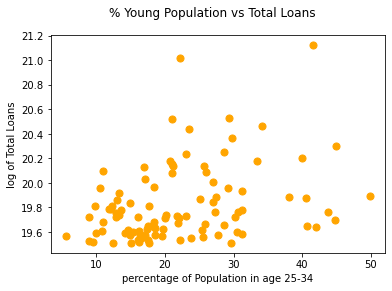

In [ ]:
newdf.plot.scatter(x='percentage of Population in age 25-34', y='log of Total Loans', s = 50, c='orange')
plt.suptitle('% Young Population vs Total Loans')

We can see from the plot that the zipcodes wherein there is a higher percentage of young population in the age bracket of 25-34, the total loans seems to be higher as well. There appears to be a positive trend among the two variables. 
This could be true because more people in this age bracket means more working population and this could lead to more loans being taken.

Additionally, we can also see that majority of zipcodes have between 10% - 35% of people in the age bracket of 25-34.

In [ ]:
#let's draw another dataframe with columns Current ApprovalAmount and gross rent housing units
dfnew1 = top100.alias("a").join(
    df.alias("b"), top100['ZCTA5'] == df['ZCTA5']
).select('a.ZCTA5', 'b.CurrentApprovalAmount', 'b.gross_rent-housing_units-3000_or_more_occupied_units_paying_rent', 'b.gross_rent-housing_units-occupied_units_paying_rent')

In [ ]:
newdf1 = dfnew1.groupby(['ZCTA5']).agg(F.sum('CurrentApprovalAmount').alias("CurrentApprovalAmount"), \
                                      F.mean('gross_rent-housing_units-3000_or_more_occupied_units_paying_rent').alias('high_rental_units'), \
                                     F.mean('gross_rent-housing_units-occupied_units_paying_rent').alias('total_rental_units'))

In [ ]:
newdf1 = newdf1.withColumn("percentage of rental units with high rent (> $3000)", col("high_rental_units")*100 / col("total_rental_units"))

In [ ]:
#convert to pandas dataframe
newdf1 = newdf1.toPandas()

In [ ]:
#take log to handle skewedness
newdf1['log of Total Loans'] = np.log(newdf1.CurrentApprovalAmount)

Text(0.5, 0.98, '% Units with High Rent vs Total Loans')

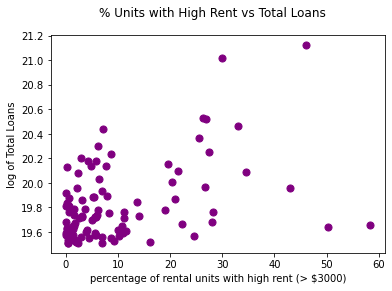

In [ ]:
#plot scatterplot to analyze relation of Units with High Rent vs Total Loans
newdf1.plot.scatter(x='percentage of rental units with high rent (> $3000)', y='log of Total Loans', s = 50, c='purple')
plt.suptitle('% Units with High Rent vs Total Loans')

We can see from the plot that the zipcodes wherein there is a higher percentage of units that have substantial rent, i.e. more than \$3000, the total loans seems to be higher as well. There appears to be a weak positive trend among the two variables. This could hold true because a greater percentage of units with high rent indicates a wealthy population and this could lead to more businesses and thus more loans.

Additionally, we can also see that majority of zipcodes have less than 30% rental units that command a rent of more than \$3000.

## (8) Optional extra credit for +10 points. What are the Top 10 zipcodes that had the highest per capita amount of loans going to Women-Owned businesses?

This column is called `Gender` in the `PPP` data.

* What State are these zipcodes in? 
* Comment on if they have anything in common? 

In [ ]:
df = df.withColumn("new_population", when(col("sex_and_age-population-total_population") < 4000, 4000).otherwise(col("sex_and_age-population-total_population")))
df4 = df[df['Gender'] == 'Female Owned'].withColumn("per_capita_loans", col("CurrentApprovalAmount") / col("sex_and_age-population-total_population"))
df5 = df4.groupby('ZCTA5').agg(sum('per_capita_loans')).sort([sum('per_capita_loans').alias('per_capita_loans')],ascending=False).limit(10)

df5.show()

+-----+---------------------+
|ZCTA5|sum(per_capita_loans)|
+-----+---------------------+
|55111|            111892.25|
|89402|    87319.92857142858|
|32461|    62538.09523809523|
|49434|    42895.71428571429|
|98238|              41560.5|
|11556|   41168.642857142855|
|94104|    38682.07564417179|
|33122|   36624.596026490064|
|11931|    36593.45588235294|
|75247|   28419.762405446298|
+-----+---------------------+



In [ ]:
# get column name containing State from the dataframe
state_columns = [col for col in df.columns if 'State' in col]
state_columns

['BorrowerState',
 'ServicingLenderState',
 'ProjectState',
 'OriginatingLenderState']

In [ ]:
df_b = df5.alias("a").join(
    df.alias("b"), df5['ZCTA5'] == df['ZCTA5']
).select("a.ZCTA5", "b.BorrowerState")

df_b.select(['ZCTA5','BorrowerState']).distinct().show()

+-----+-------------+
|ZCTA5|BorrowerState|
+-----+-------------+
|11931|           NY|
|33122|           FL|
|89402|           NV|
|55111|           MN|
|98238|           WA|
|94104|           CA|
|75247|           TX|
|11556|           NY|
|32461|           FL|
|49434|           MI|
+-----+-------------+



These states appear to be those that would have higher percentage of people in the Upper Tier of wages.

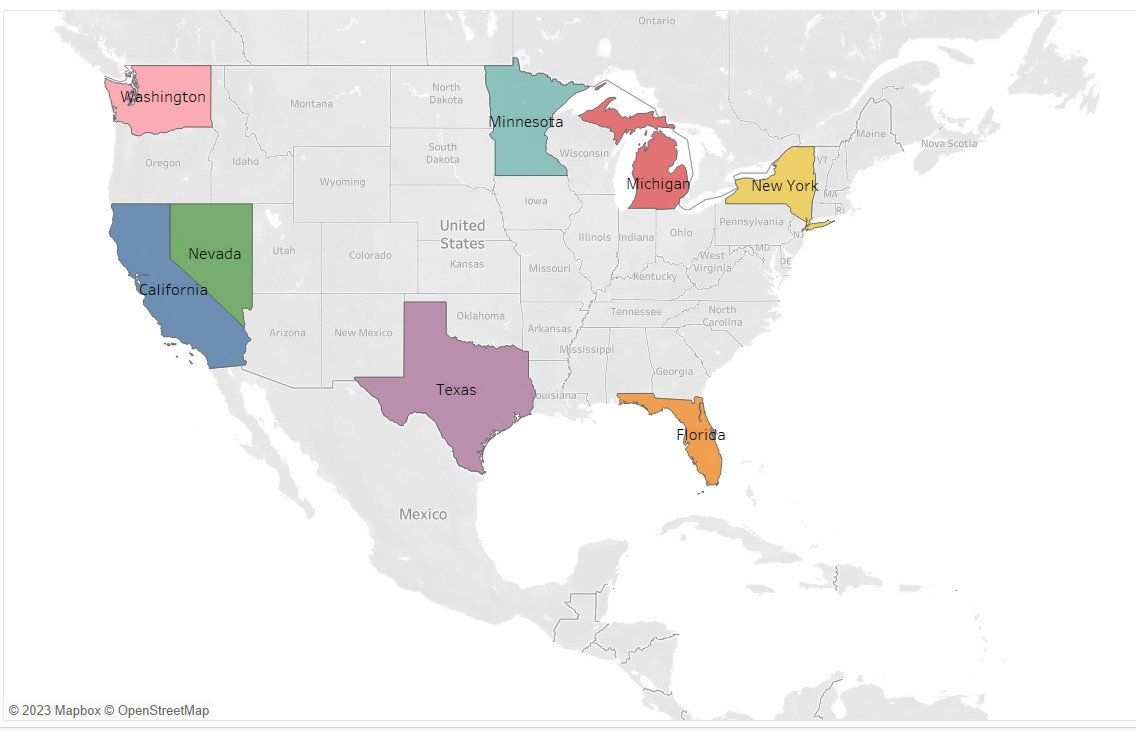

# 🔴 Conclusion (5 pts)

## (1) What did you learn? 
Write five detailed bullets about what you learned. 

1. Downloading and extracting data from the SBA government site and the Census Bureau website, and then organizing the data into appropriate directories and folders, using linux commands, for ease of access and analysis.
3. Navigating through big data, searching for columns with substrings, merging and joining datasets from multiple sources using PySpark's join() and union() functions.
4. Handling missing or inconsistent data using techniques such as data imputation, deletion or replacement.
5. Filtering, transforming and aggregating data using PySpark's built-in functions like filter(), groupBy(), agg(), and pivot().
6. Visualizing data and results using data visualization tools like Matplotlib and Seaborn libraries etc.

# On Your Own (no credit)
No points - but can you download ALL files for PPP data (several gigabytes of data) and re-run this script with ease? Post on the discussion board if you do!